In [661]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [662]:
df=pd.read_csv('concrete.csv')
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [663]:
df

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [664]:
df.describe()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [665]:
df.keys()

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

In [666]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Blast             1030 non-null   float64
 2   Fly Ash           1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CA                1030 non-null   float64
 6   FA                1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CMS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [667]:
df.CMS.unique()

array([79.99, 61.89, 40.27, 41.05, 44.3 , 47.03, 43.7 , 36.45, 45.85,
       39.29, 38.07, 28.02, 43.01, 42.33, 47.81, 52.91, 39.36, 56.14,
       40.56, 42.62, 41.84, 28.24,  8.06, 44.21, 52.52, 53.3 , 41.15,
       52.12, 37.43, 38.6 , 55.26, 41.72, 42.13, 53.69, 38.41, 30.08,
       37.72, 42.23, 36.25, 50.46, 39.  , 53.1 , 41.54, 35.08, 15.05,
       40.76, 26.26, 32.82, 39.78, 46.93, 33.12, 49.19, 14.59, 14.64,
       41.93,  9.13, 50.95, 33.02, 54.38, 51.73,  9.87, 50.66, 48.7 ,
       55.06, 44.7 , 30.28, 40.86, 71.99, 34.4 , 28.8 , 33.4 , 36.3 ,
       29.  , 37.8 , 40.2 , 28.1 , 41.3 , 25.2 , 41.1 , 35.3 , 28.3 ,
       28.6 , 24.4 , 39.3 , 40.6 , 24.1 , 46.2 , 42.8 , 49.2 , 46.8 ,
       45.7 , 55.6 , 54.9 , 34.9 , 46.9 , 54.1 , 55.9 , 49.8 , 47.1 ,
       38.  , 56.1 , 59.09, 22.9 , 35.1 , 61.09, 59.8 , 60.29, 61.8 ,
       56.7 , 68.3 , 66.9 , 50.7 , 56.4 , 55.5 , 68.5 , 71.3 , 74.7 ,
       52.2 , 67.7 , 66.  , 74.5 , 49.9 , 63.4 , 64.9 , 64.3 , 60.2 ,
       72.3 , 69.3 ,

In [668]:
df.CMS.value_counts()

33.40    6
71.30    4
41.05    4
31.35    4
23.52    4
        ..
38.33    1
10.73    1
30.45    1
39.84    1
36.25    1
Name: CMS, Length: 845, dtype: int64

In [669]:
df.isnull().sum()

Cement              0
Blast               0
Fly Ash             0
Water               0
Superplasticizer    0
CA                  0
FA                  0
Age                 0
CMS                 0
dtype: int64

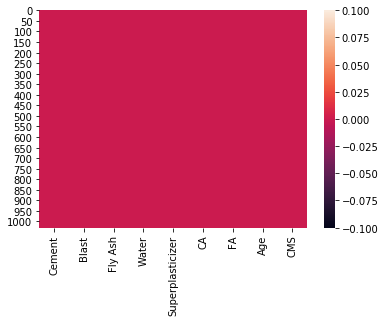

In [670]:
sns.heatmap(df.isnull())

In [671]:
dfcor=df.corr()
dfcor

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CA,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FA,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
CMS,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


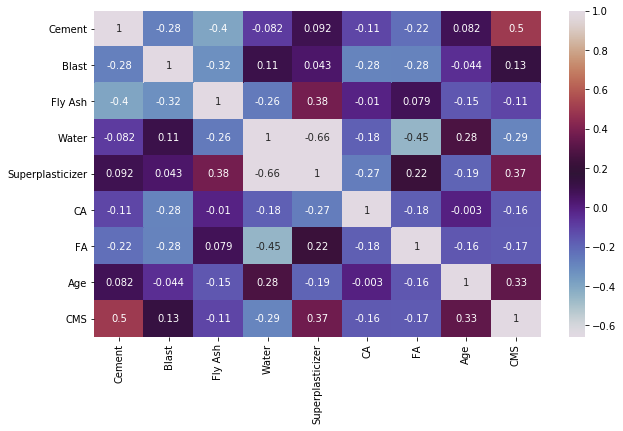

In [672]:
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap='twilight',annot=True)

In [673]:
sns.color_palette?

In [674]:
sns.heatmap?

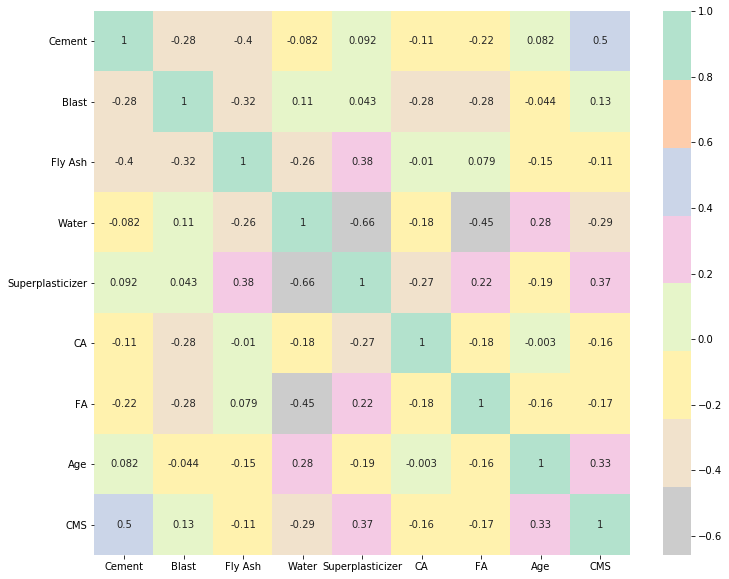

In [675]:
plt.figure(figsize=(12,10))
sns.heatmap(dfcor,cmap='Pastel2_r',annot=True)

In [676]:
df.columns

Index(['Cement', 'Blast', 'Fly Ash', 'Water', 'Superplasticizer', 'CA', 'FA',
       'Age', 'CMS'],
      dtype='object')

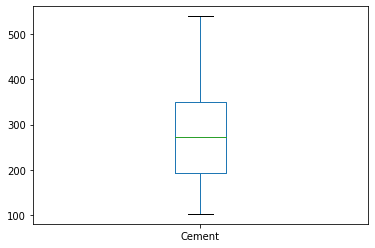

In [677]:
df['Cement'].plot.box()

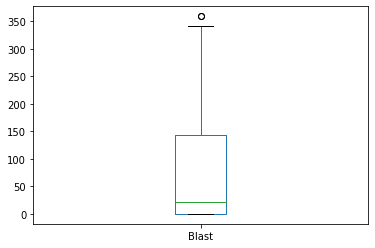

In [678]:
df['Blast'].plot.box()

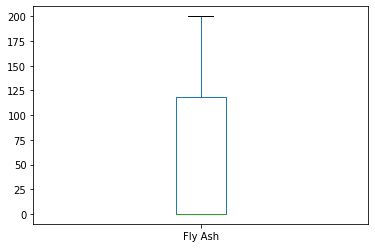

In [679]:
df['Fly Ash'].plot.box()

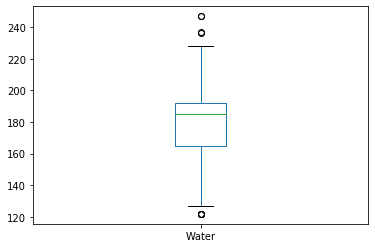

In [680]:
df['Water'].plot.box()

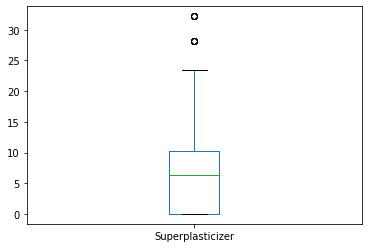

In [681]:
df['Superplasticizer'].plot.box()

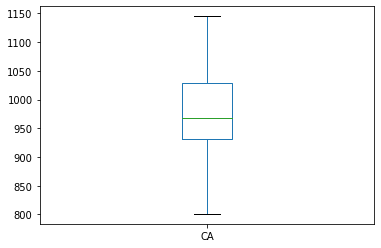

In [682]:
df['CA'].plot.box()

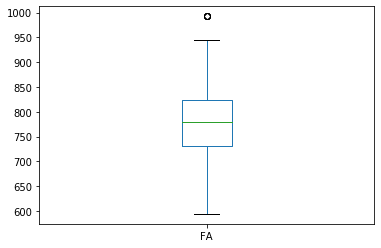

In [683]:
df['FA'].plot.box()

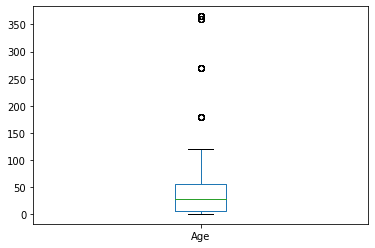

In [684]:
df['Age'].plot.box()

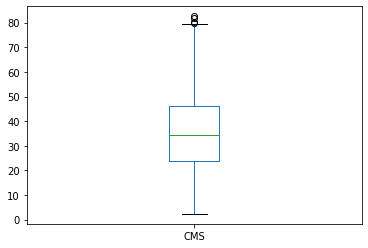

In [685]:
df['CMS'].plot.box()

Cement                 AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Blast               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Fly Ash             AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Water               AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Superplasticizer    AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
CA                  AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
FA                  AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Age                       AxesSubplot(0.125,0.125;0.0945122x0.343182)
CMS                    AxesSubplot(0.238415,0.125;0.0945122x0.343182)
dtype: object

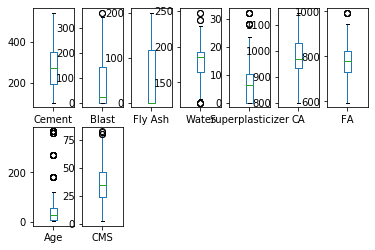

In [686]:
df.plot(kind='box',subplots=True,layout=(2,7))

In [687]:
collist=df.columns.values
ncol=5
nrows=5

In [688]:
plt.subplot?

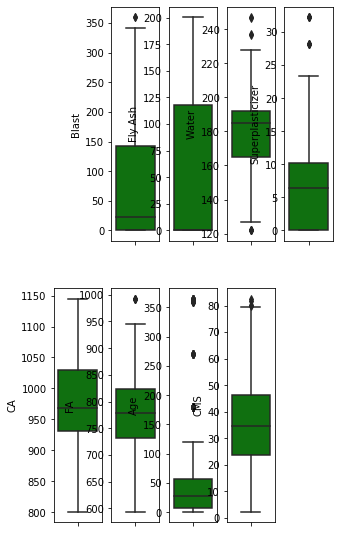

In [689]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')

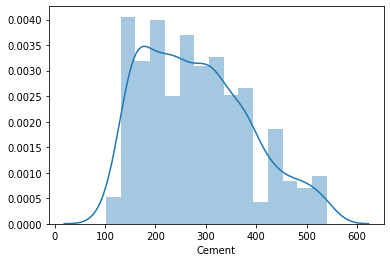

In [690]:
plt.tight_layout()
sns.distplot(df['Cement'])

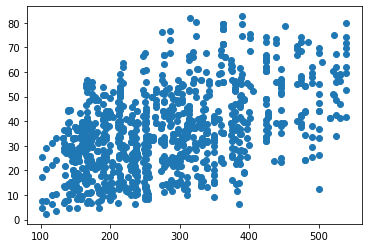

In [691]:
plt.scatter(df['Cement'],df['CMS'])

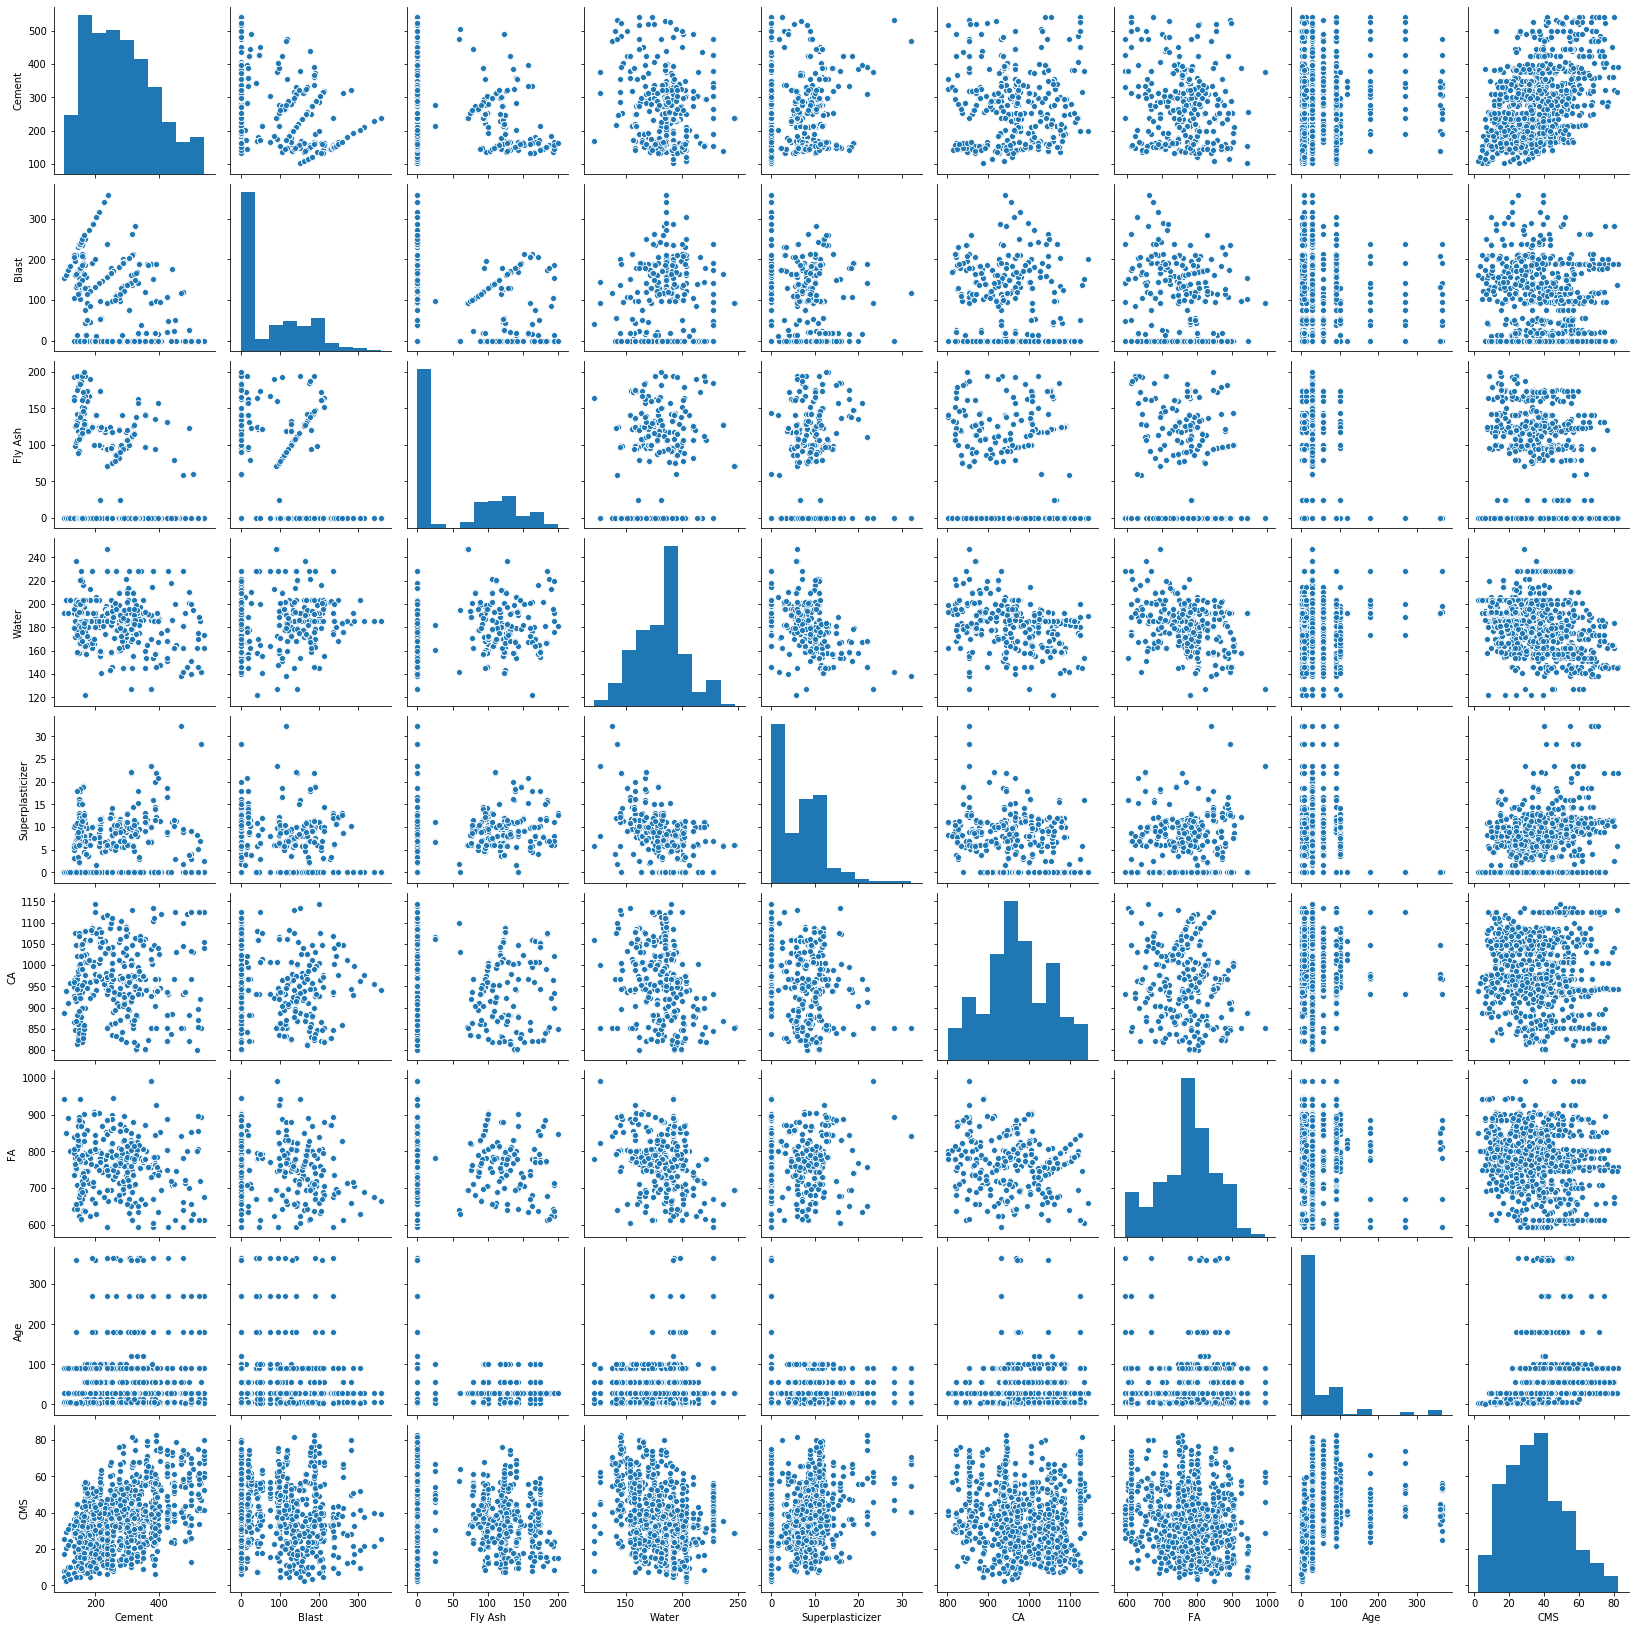

In [692]:
sns.pairplot(df)

In [693]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [694]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


In [695]:
z[2][7]

3.553065687407453

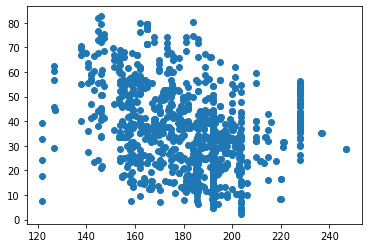

In [696]:
plt.scatter(df['Water'],df['CMS'])

In [697]:
df_new=df[(z<3).all(axis=1)]

In [698]:
df.shape

(1030, 9)

In [699]:
df_new.shape

(981, 9)

In [700]:
df=df_new
df.shape

(981, 9)

In [701]:
df.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age,CMS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85


In [702]:
x=df.iloc[:,0:8]
x.head()

,Cement,Blast,Fly Ash,Water,Superplasticizer,CA,FA,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [703]:
y=df.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: CMS, dtype: float64

In [704]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=55)

In [705]:
x_train.shape

(951, 8)

In [706]:
y_train.shape

(951,)

In [707]:
lm=LinearRegression()

In [708]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [709]:
lm.coef_

array([ 0.1154721 ,  0.09740563,  0.07438453, -0.18454374,  0.31496895,
        0.00825705,  0.00950841,  0.21975997])

In [710]:
lm.intercept_

-0.16462458225519327

In [711]:
lm.score(x_train,y_train)

0.7028507508603994

In [712]:
pred=lm.predict(x_test)
print('predicted CMS',pred)
print('actual CMS',y_test)

predicted CMS [29.89699503 30.51896048 31.36061359 22.13727814 52.51542326 22.72656091
 26.5241599  24.05579798 33.47791002 60.4501193  42.23560928 27.16492119
 31.62221529 13.51839056 23.10974311 24.4153654  46.3120568  40.89287788
 29.86813168 19.17809819 33.1388648  51.29108832 50.80102857 54.11011487
 48.83761628 24.71993036 33.25908586 29.53160546 60.63104242 21.11344522]
actual CMS 339    21.91
925    27.23
434    39.16
250    24.92
112    56.10
572    13.09
201    26.40
215    22.72
325    42.29
153    80.20
816    42.42
789    32.72
837    39.05
680    17.28
636    26.85
967    23.79
491    36.84
734    40.66
456    43.39
194    12.45
920    29.07
971    44.52
486    46.68
539    54.32
461    53.66
940    31.42
928    24.58
296    31.12
155    77.30
205    20.92
Name: CMS, dtype: float64


In [713]:
print('error')

print('mean squared error:',mean_squared_error(y_test,pred))
print('mean absolute error:',mean_absolute_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))

error
mean squared error: 55.1400487251204
mean absolute error: 5.672457350721866
root mean squared error: 7.425634567168007
0.789678771930576


In [714]:
t=np.array([600.0,120.0,45.0,256.8,2.5,936.2,673.5,32])

In [715]:
t.shape

(8,)

In [716]:
t=t.reshape(1,-1)
t.shape

(1, 8)

In [717]:
lm.predict(t)

array([58.71768059])

In [718]:
df=pd.DataFrame(pred)
df.to_csv('concrete_CSM.csv')